## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load data from csv file to pandas

titanic_data=pd.read_csv("train.csv")

In [3]:
# printing first 5 rows from dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# number of rows and column in data

titanic_data.shape

(891, 12)

In [5]:
# getting some information about data 

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking for missing value in each column

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###  Handling missing values



In [7]:
# Drop the "cabin" column from the data

titanic_data=titanic_data.drop(columns="Cabin",axis=1)

In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
# Replacing the missing values in "Age" column with mean value

titanic_data["Age"].fillna(titanic_data['Age'].mean(),inplace=True)

In [10]:
# Finding the mode value of embarked column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(titanic_data['Embarked'].mode()[0])

S


In [12]:
# replacing the missing value in embarked column with mode value

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [13]:
# check for number of missing values in each column

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##  Data Analysis

In [14]:
# getting some statistical measure about the dataframe

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# finding the number of people survived and not survived

titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data Visualization

In [16]:
sns.set()

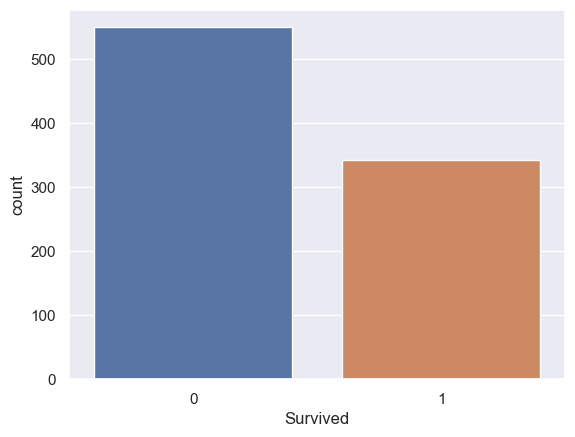

In [17]:
#  making a count plot for survived column

sns.countplot(x='Survived', data= titanic_data)
plt.show()

In [18]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

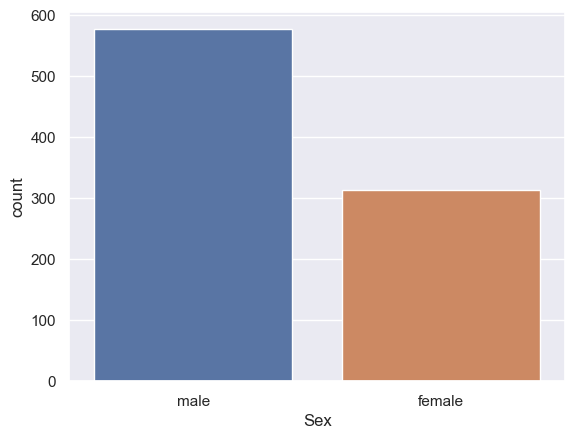

In [19]:
#  making a count plot for Sex column

sns.countplot(x='Sex', data= titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

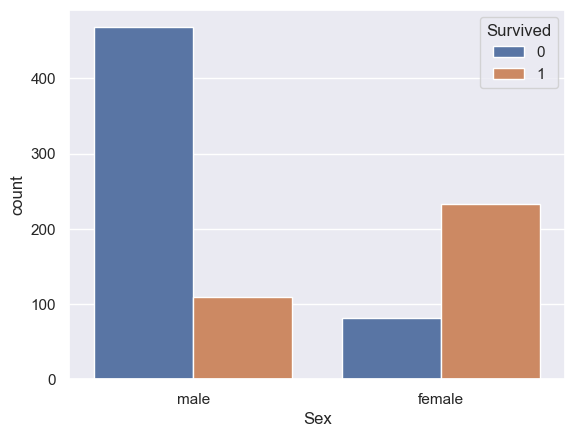

In [20]:
# number of survivor Genderwise

sns.countplot(x="Sex",hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

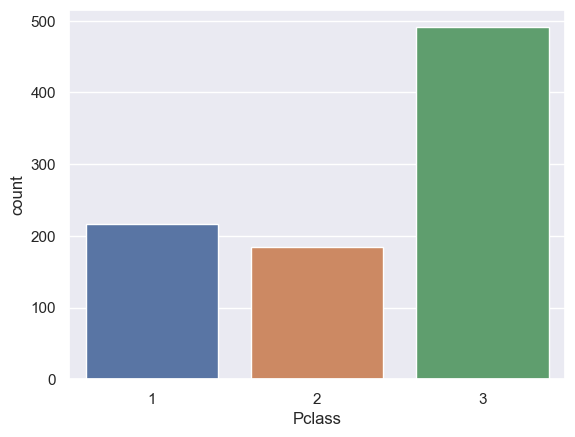

In [21]:
#  making a count plot for Pclass column

sns.countplot(x='Pclass', data= titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

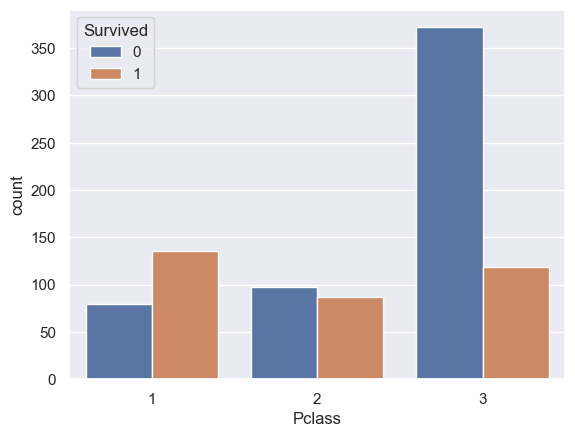

In [22]:
sns.countplot(x="Pclass",hue='Survived', data=titanic_data)

<Axes: xlabel='Age', ylabel='Count'>

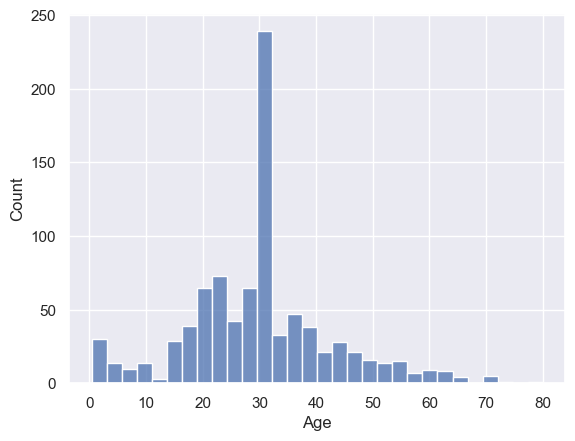

In [23]:
# Numerical attribute

sns.histplot(titanic_data['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

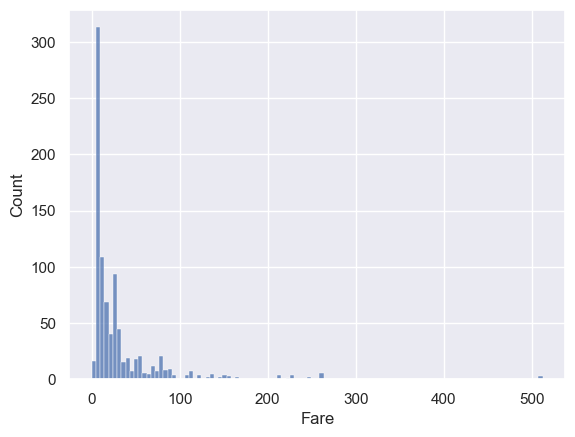

In [24]:
sns.histplot(titanic_data['Fare'])

In [25]:
## Log transformation for uniform data distribution

titanic_data['Fare']=np.log(titanic_data['Fare']+1)

<Axes: xlabel='Fare', ylabel='Count'>

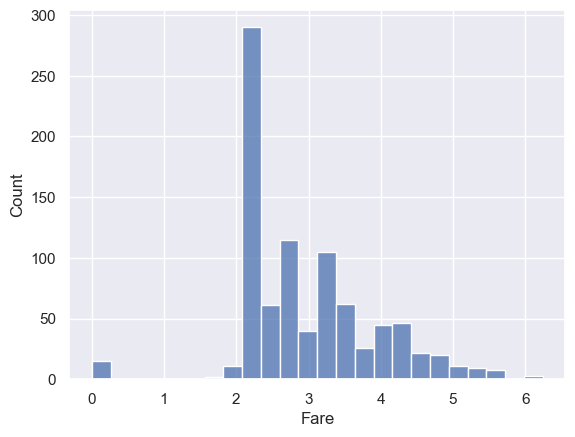

In [26]:
sns.histplot(titanic_data['Fare'])

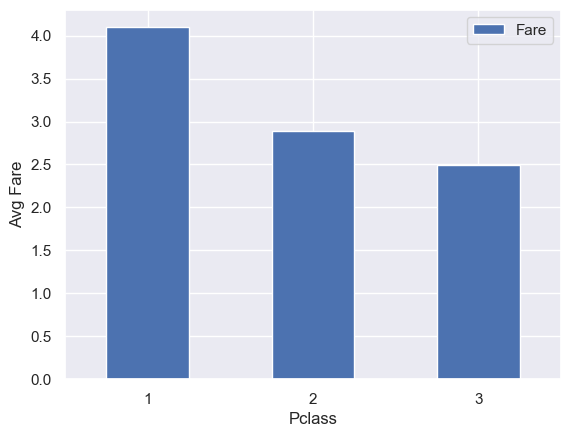

In [27]:
class_fare= titanic_data.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show()

C:\Users\shush\AppData\Local\Temp\ipykernel_19900\3352820263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=titanic_data.corr()


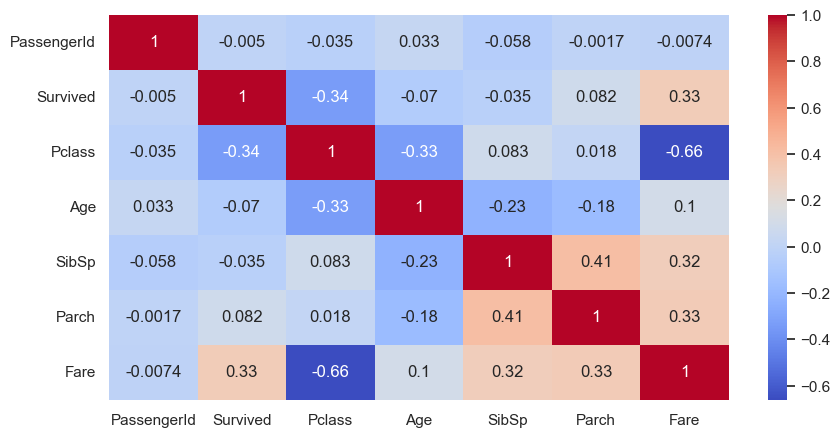

In [28]:
corr=titanic_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Encoding the Categorical column

In [29]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
#  Converting categorical column 

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [32]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,2.110213,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.280593,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.188856,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.990834,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.202765,0


In [33]:
# separating features and target

x = titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [34]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,2.110213,0
1,1,1,38.000000,1,0,4.280593,1
2,3,1,26.000000,0,0,2.188856,0
3,1,1,35.000000,1,0,3.990834,0
4,3,0,35.000000,0,0,2.202765,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,2.639057,0
887,1,1,19.000000,0,0,3.433987,0
888,3,1,29.699118,1,2,3.196630,0
889,1,0,26.000000,0,0,3.433987,1


In [35]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
# splitting data into training data and test data

x_test , x_train ,  y_test,y_train = train_test_split(x,y,train_size=0.2)

In [37]:
print(x.shape,x_test.shape,x_train.shape)

(891, 7) (178, 7) (713, 7)


## Model Training

### Logistic Regression

In [38]:
model=LogisticRegression()

In [39]:
# Training the logistic regression model with train data

model.fit(x_train,y_train)

LogisticRegression()

##  Model Evaluation

#### Accuracy score

In [40]:
# accuracy on Training data

predict=model.predict(x_train)

In [41]:
print(predict)

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 

In [42]:
accuracy_training=accuracy_score(y_train,predict)

In [43]:
print('Accuracy score of training data: ', accuracy_training)

Accuracy score of training data:  0.8064516129032258


In [44]:
# accuracy on Test data

predict=model.predict(x_test)

In [45]:
predict

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [46]:
accuracy_test=accuracy_score(y_test,predict)

In [47]:
print('Accuracy score of test data: ', accuracy_test)

Accuracy score of test data:  0.8089887640449438


## Prediction on given input

In [48]:
input_data=(1,1,38.000000,1,0,4.280593,1)
input_reshape=np.asarray(input_data)
input_1=input_reshape.reshape(1,-1)

In [51]:
output=model.predict(input_1)
output

C:\Users\shush\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [52]:
if output[0]==1:
    print('The person will be saved from sinking')
else:
    print("The person will not saved from sinking")

The person will be saved from sinking
